In [44]:
from utils.analysis.make_movies import write_movies_two_component_2d
from utils.analysis.tools import simDir
from utils.tvregdiff import TVRegDiff
import os
from utils.file_operations import input_parse
from utils.simulation_helper import set_mesh_geometry
import multiprocessing as mp
import h5py
from pathlib import Path
from utils import plot
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
from scipy.ndimage import uniform_filter1d
from scipy.interpolate import splrep, splev


In [2]:
root = "/nfs/arupclab001/davidgoh/CoupledEPCondensates/workspace/20231017_flow/20231021_output/"
folders = [os.path.join(root,i) for i in os.listdir(root) if i.startswith("M_")]

def movies(folder):
    try:
        if os.path.isdir(os.path.join(folder,"movies")):
            return None
        input_params = input_parse(os.path.join(folder,"input_params.txt"))
        movie_params = input_parse("movie_parameters.txt")
        sim_geometry = set_mesh_geometry(input_params)
        write_movies_two_component_2d(folder, "spatial_variables.hdf5", movie_params, sim_geometry.mesh)
    except:
        print(f"Failed {folder}")

In [4]:
root = "/nfs/arupclab001/davidgoh/CoupledEPCondensates/workspace/20231017_flow/20231021_output/"
folders = [os.path.join(root,i) for i in os.listdir(root) if i.startswith("M_")]

In [8]:
sim = simDir(folders[0])
sim.run()

In [9]:
com, e, r = sim.condensate()

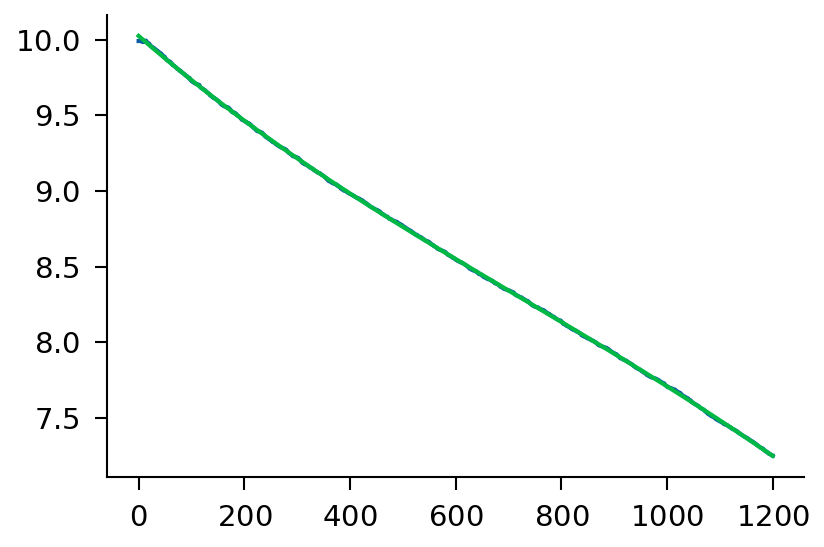

In [60]:
x = np.arange(len(com[:,0]))
y = com[:,0]
f = splrep(x, y,k=5,s=3)
plt.plot(x, y, label="fitted")
plt.plot(x, splev(x,f), label="fitted")
fig,ax = plt.subplots()
plt.plot(-np.diff(y))
plt.plot(x, -splev(x,f,der=1))
ax.set_ylim(bottom=0)

In [32]:
len(folders)

81

In [56]:
folders = []
root = Path("/nfs/arupclab001/davidgoh/CoupledEPCondensates/workspace/20231017_flow/20231023_output/")
folders += [root / p for p in root.iterdir() if p.match("M1*")]
root = Path("/nfs/arupclab001/davidgoh/CoupledEPCondensates/workspace/20231017_flow/20231022_output/")
folders += [root / p for p in root.iterdir() if p.match("M1*")]
root = Path("/nfs/arupclab001/davidgoh/CoupledEPCondensates/workspace/20231017_flow/20231021_output/")
folders += [root / p for p in root.iterdir() if p.match("M_1*")]
root = Path("/nfs/arupclab001/davidgoh/CoupledEPCondensates/workspace/20231017_flow/20231020_output/")
folders += [root / p for p in root.iterdir() if p.match("M_1*")]

In [5]:
root = Path("/nfs/arupclab001/davidgoh/CoupledEPCondensates/workspace/20231017_flow/20231023_output/")
folders = [root / p for p in root.iterdir() if p.match("M1*")]

def movies(folder):
    try:
        sim = simDir(folder)
        sim.run()
        sim.makeFigure(i=0)
        sim.makeFigure(i=1)
    except:
        print(f"Failed {folder}")

def condensates(folder):
    try:
        sim = simDir(folder)
        sim.run()
        com, e, r = sim.condensate()
        fig,ax = plt.subplots(4,1)
        fig.set_size_inches((3,5))
        ax[0].plot(com[:,0])
        ax[0].set_xlabel("Frame")
        ax[0].set_ylabel("Distance\nfrom locus")
        arr = -np.gradient(com[:,0])
        ax[1].plot(com[:,0],arr)
        ax[1].set_xlabel("Distance\nfrom locus")
        ax[1].invert_xaxis()
        ax[1].set_ylabel("Condensate\nvelocity")
        ax[2].plot(e)
        ax[2].set_ylabel("Eccentricity")
        ax[2].set_xlabel("Frame")
        var_r = np.var(r,axis=1)
        ax[3].plot(var_r)
        ax[3].set_ylabel("Radius\nvariance")
        ax[3].set_xlabel("Frame")
        fig.tight_layout()
        fig.savefig(folder / "figures" / "condensate.png")
    except:
        return f"Failed {folder}"

In [58]:
pool = mp.Pool(processes=(mp.cpu_count() - 1))
pool.map(condensates,folders)

[None,
 None,
 'Failed /nfs/arupclab001/davidgoh/CoupledEPCondensates/workspace/20231017_flow/20231023_output/M1_1.0_beta_-0.25_gamma_-0.1_kappa_0.05_kprod_0.05_c1Init_3.5_noiseVar_0.0_rxnSigma_2.5_seed_5.5_loc_10',
 None,
 None,
 None,
 None,
 None,
 None,
 'Failed /nfs/arupclab001/davidgoh/CoupledEPCondensates/workspace/20231017_flow/20231023_output/M1_1.0_beta_-0.25_gamma_-0.1_kappa_0.05_kprod_0.1_c1Init_3.5_noiseVar_0.0_rxnSigma_2.5_seed_5.5_loc_10',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 N

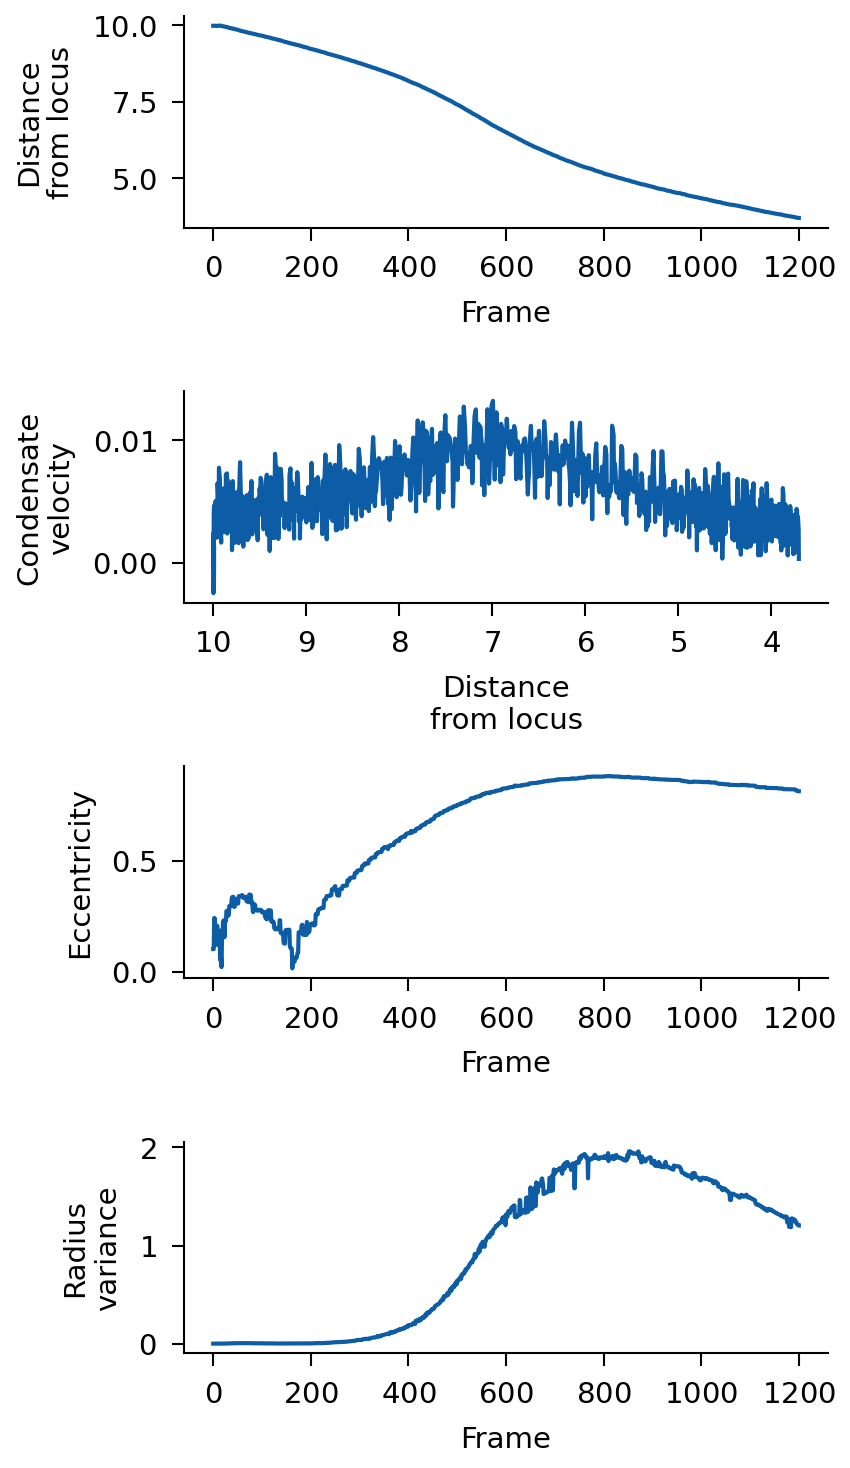

In [6]:
root = Path("/nfs/arupclab001/davidgoh/CoupledEPCondensates/workspace/20231017_flow/20231022_output/M1_1.0_beta_-0.25_gamma_-0.1_kappa_0.05_kprod_0.1_c1Init_3.6_noiseVar_0.0_rxnSigma_2.5_seed_5.5_loc_10")
condensates(root)

In [6]:
pool = mp.Pool(processes=(mp.cpu_count() - 1))
pool.map(movies,folders)

Successfully made the directory /nfs/arupclab001/davidgoh/CoupledEPCondensates/workspace/20231017_flow/20231020_output/M_1_1.0_beta_-0.25_gamma_-0.1_kappa_0.05_K_0.0_K_spatial_0.1_c_initial_3.6_noise_variance_0.0_reaction_sigma_2.5_location_0/figures ...Successfully made the directory /nfs/arupclab001/davidgoh/CoupledEPCondensates/workspace/20231017_flow/20231020_output/M_1_1.0_beta_-0.25_gamma_-0.1_kappa_0.05_K_0.0_K_spatial_4.0_c_initial_3.6_noise_variance_0.0_reaction_sigma_4.0_location_10/figures ...

Successfully made the directory /nfs/arupclab001/davidgoh/CoupledEPCondensates/workspace/20231017_flow/20231020_output/M_1_1.0_beta_-0.25_gamma_-0.1_kappa_0.05_K_0.0_K_spatial_0.1_c_initial_3.6_noise_variance_0.0_reaction_sigma_2.5_location_2/figures ...Successfully made the directory /nfs/arupclab001/davidgoh/CoupledEPCondensates/workspace/20231017_flow/20231020_output/M_1_1.0_beta_-0.25_gamma_-0.1_kappa_0.05_K_0.0_K_spatial_3.0_c_initial_3.6_noise_variance_0.0_reaction_sigma_4.0_loc

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]